In [129]:
import os
from scipy import ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt
from base_function import mendeley_scrap_data

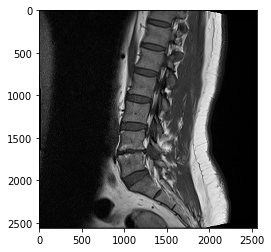

<Figure size 432x288 with 0 Axes>

In [146]:
BASE_PATH = '..\\..\\test-data'
first_patient_root_path = f'{BASE_PATH}\\0001\\L-SPINE_LSS_20160309_091629_240000'
dirs = os.listdir(first_patient_root_path)

os.listdir(f'{first_patient_root_path}\\{dirs[0]}')

parsed_fp = mendeley_scrap_data(first_patient_root_path) 

t1_sag = parsed_fp['data'][2]['image_sequence']
image_seq = [x['binary_data'] for x in t1_sag]

image_test = ndi.zoom(image_seq[5], zoom=8, order=3)

plt.imshow(image_test, cmap='gray')

plt.show()
plt.savefig('original_image.png')

In [147]:
from skimage.exposure import histogram

hist, hist_centers = histogram(image_test)


fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(image_test, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram of gray values')

Text(0.5, 1.0, 'histogram of gray values')

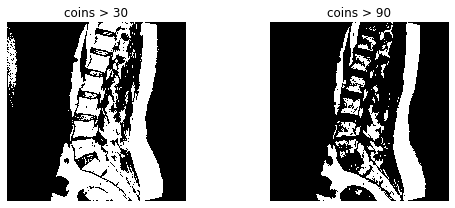

In [148]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(image_test > 60, cmap=plt.cm.gray)
axes[0].set_title('coins > 30')

axes[1].imshow(image_test > 90, cmap=plt.cm.gray)
axes[1].set_title('coins > 90')

for ax in axes:
    ax.axis('off')

plt.tight_layout()

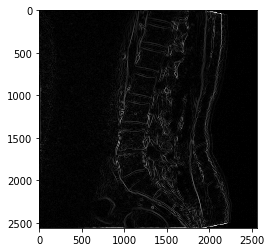

In [155]:
from skimage.filters import sobel, roberts

el_map = sobel(image_test)

plt.imshow(el_map, cmap='gray')
plt.savefig('sobel_operator.png')

markers = np.zeros_like(image_test)
markers[image_test < 50] = 1
markers[image_test > 90] = 2

from skimage.morphology import watershed

segmentation = watershed(el_map, markers)

In [156]:
segmentation = ndi.binary_fill_holes(segmentation - 1)
labeled_spine, feature_num = ndi.label(segmentation)


plt.imshow(labeled_spine)
plt.savefig('labeled_spine.png')
print(feature_num)

33


In [104]:
print(labeled_spine)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
44


In [145]:
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(image_test, figsize=(10, 8), verbose=False)
plt.show()